In [58]:
import pandas as pd
import datetime
import calendar
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
import numpy as np
import datetime as dt
import seaborn as sns

In [59]:
data = pd.read_csv(r"C:\Users\A_R_COMPUTERS\Desktop\BA\Data\netflix_titles.csv")

In [60]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [61]:
data.shape

(7787, 12)

In [62]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [63]:
data.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [65]:
data["country"] = data["country"].astype(str)
data["release_year"] = data["release_year"].astype(int)

In [66]:
data['country'].replace(np.nan, 'No Data',inplace  = True)
data['cast'].replace(np.nan, 'No Data',inplace  = True)
data['director'].replace(np.nan, 'No Data',inplace  = True)

# Drops
data.dropna(subset=["date_added", "rating"], inplace=True)

In [67]:
data.shape

(7770, 12)

In [68]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Movie      5372
TV Show    2398
Name: type, dtype: int64


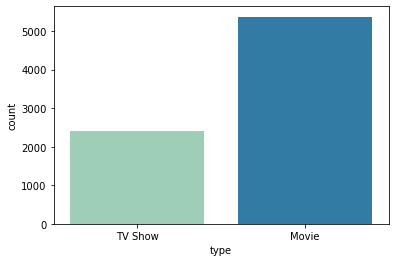

In [69]:
sns.countplot(x='type', data= data, palette="YlGnBu")
print(data.type.value_counts())

##### Netflix has more movies than TV Shows

In [70]:
data["date_added"] = pd.to_datetime(data['date_added'])
data['year_added'] = data['date_added'].dt.year
data["year_added"].value_counts()

2019    2153
2020    2009
2018    1684
2017    1222
2016     440
2021     117
2015      88
2014      25
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: year_added, dtype: int64

##### Most movies were added in the year 2019 and only 1 movie in the year 2010

In [71]:
data['month_added']=data['date_added'].dt.month
data["month_added"].value_counts()

12    832
10    785
1     756
11    738
3     668
9     618
8     617
7     600
4     600
5     543
6     542
2     471
Name: month_added, dtype: int64

#### Most movies were added during Holidays in December and least in the month of Feb

In [72]:
print(data.rating.value_counts())

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64


<AxesSubplot:xlabel='rating', ylabel='count'>

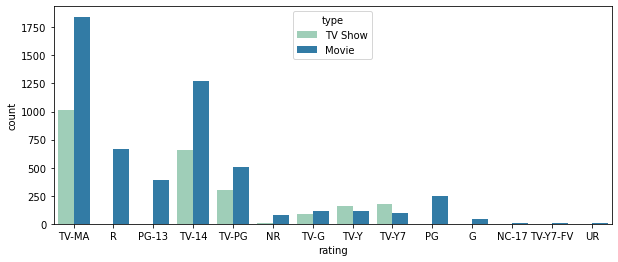

In [73]:
plt.figure(figsize=(10,4))
sns.countplot(x='rating', hue= 'type', data= data, palette="YlGnBu")

TV-MA has the highest count of contents while NC-17 has lowest.

In [74]:
data.country.value_counts()

United States                                                   2546
India                                                            923
nan                                                              505
United Kingdom                                                   396
Japan                                                            224
                                                                ... 
Israel, Sweden, Germany, Netherlands                               1
Canada, India, Thailand, United States, United Arab Emirates       1
United Kingdom, Jordan, Qatar, Iran                                1
Guatemala                                                          1
Kenya, United States                                               1
Name: country, Length: 682, dtype: int64

In [75]:
from collections import Counter
country = data['country']
filtered_countries = country[country != 'No Data']
country_count = pd.Series(dict(Counter(','.join(filtered_countries).split(',')))).sort_values(ascending=False)
top20 = country_count.head(20)

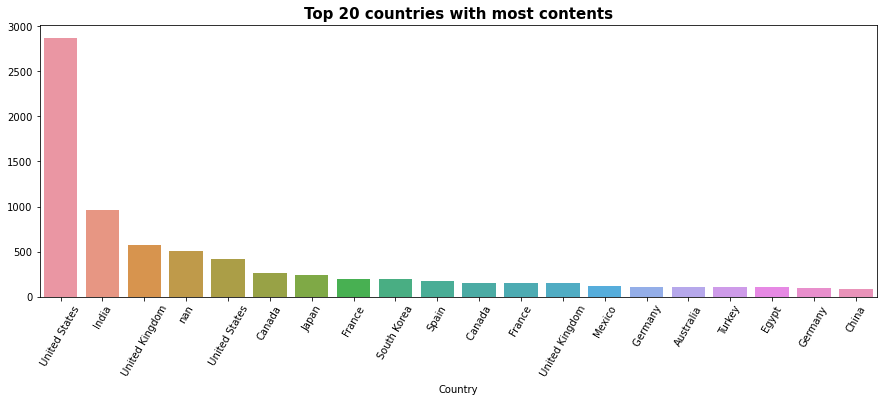

In [76]:
plt.figure(figsize=(15,5))
sns.barplot(x= top20.index, y=top20)
plt.xticks(rotation=60)
plt.title('Top 20 countries with most contents', fontsize=15, fontweight='bold')
plt.xlabel('Country')
plt.show()

Most contents are produced by US

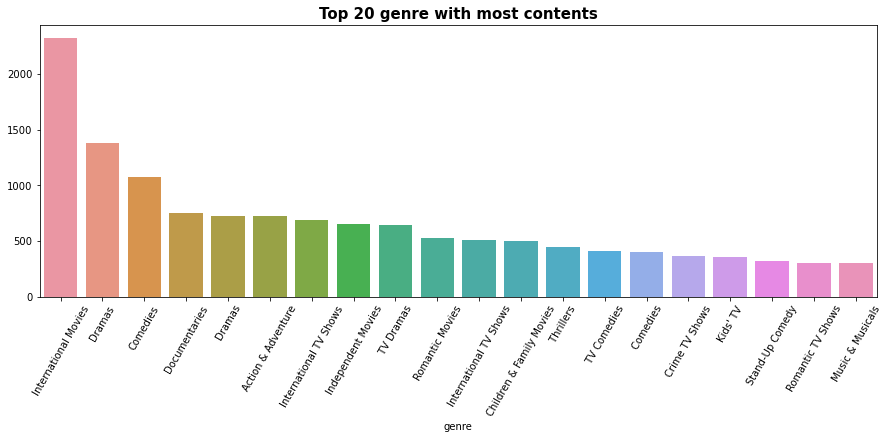

In [77]:
listed_in = data['listed_in']
genre_count = pd.Series(dict(Counter(','.join(listed_in).split(',')))).sort_values(ascending=False)
top20genre = genre_count.head(20)

plt.figure(figsize=(15,5))
sns.barplot(x= top20genre.index, y=top20genre)
plt.xticks(rotation=60)
plt.title('Top 20 genre with most contents', fontsize=15, fontweight='bold')
plt.xlabel('genre')
plt.show()

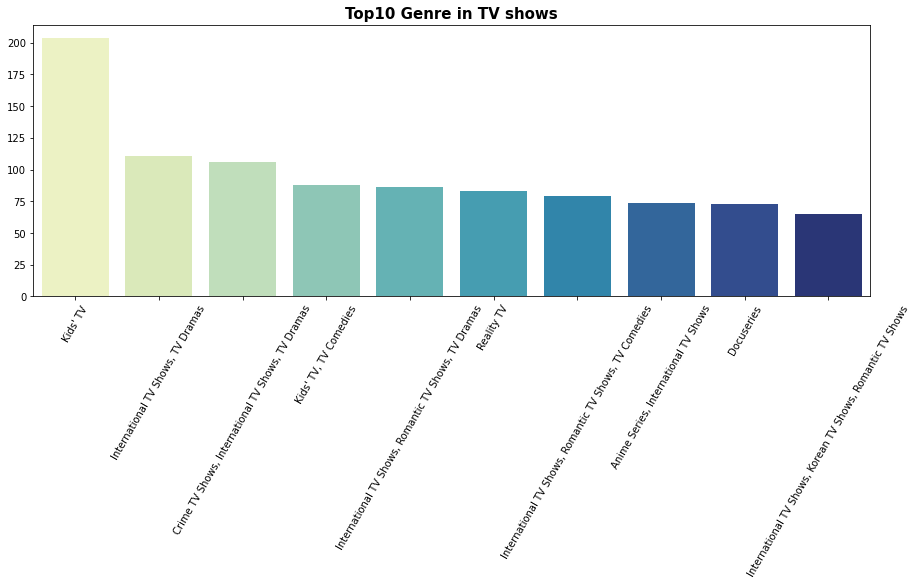

In [78]:
plt.figure(figsize=(15,5))
sns.barplot(x = tvshows_df["listed_in"].value_counts().head(10).index,
            y = tvshows_df["listed_in"].value_counts().head(10).values, palette="YlGnBu")
plt.xticks(rotation=60)
plt.title("Top10 Genre in TV shows", fontsize=15, fontweight="bold")
plt.show()

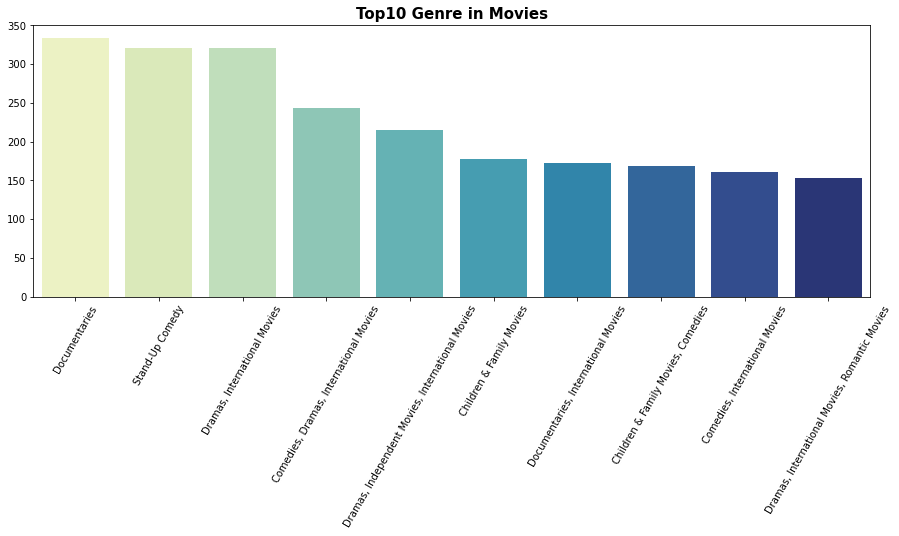

In [80]:
plt.figure(figsize=(15,5))
sns.barplot(x = movies_df["listed_in"].value_counts().head(10).index,
            y = movies_df["listed_in"].value_counts().head(10).values, palette="YlGnBu")
plt.xticks(rotation=60)
plt.title("Top10 Genre in Movies", fontsize=15, fontweight="bold")
plt.show()

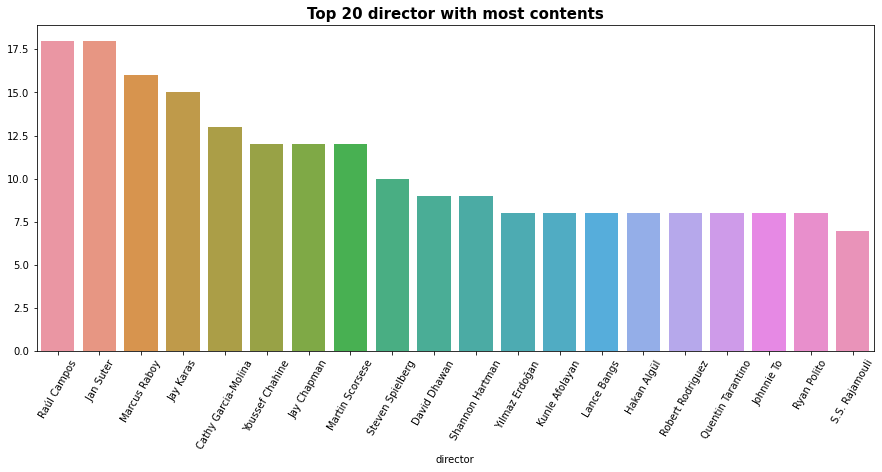

In [81]:
director = data['director']
filtered_director = director[director != 'No Data']
director_count = pd.Series(dict(Counter(','.join(filtered_director).split(',')))).sort_values(ascending=False)
top20director = director_count.head(20)


plt.figure(figsize=(15,6))
sns.barplot(x= top20director.index, y=top20director)
plt.xticks(rotation=60)
plt.title('Top 20 director with most contents', fontsize=15, fontweight='bold')
plt.xlabel('director')
plt.show()


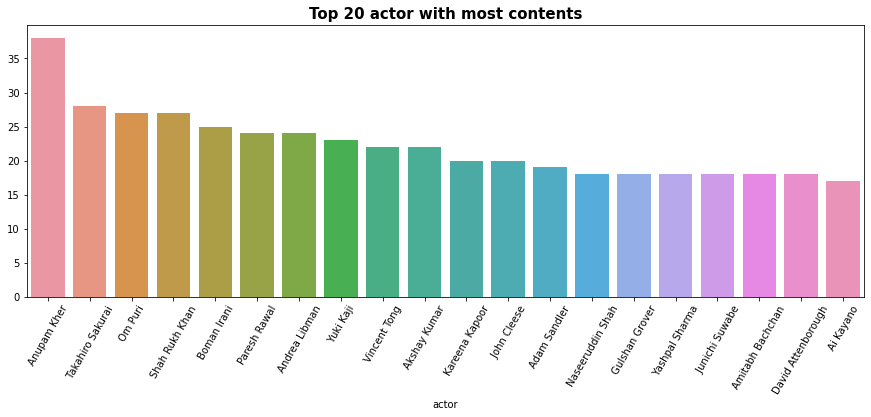

In [82]:
actor = data['cast']
filtered_actor = actor[actor != 'No Data']
actor_count = pd.Series(dict(Counter(','.join(filtered_actor).split(',')))).sort_values(ascending=False)
top20actor = actor_count.head(20)


plt.figure(figsize=(15,5))
sns.barplot(x= top20actor.index, y=top20actor)
plt.xticks(rotation=60)
plt.title('Top 20 actor with most contents', fontsize=15, fontweight='bold')
plt.xlabel('actor')
plt.show()